# Introduction

As of August 8, 2022, gas prices have been declining.  But will it continue to decline? The rising cost of oil is
due to high demand and limite supply.  As everyone else, I have felt the increasing cost of gas at the pump even though I drive
a prius. What is the cost of gas expected to be next year?

This project is a personal project and the 6 steps of Data Analysis from Gooogle Data Analytics Professional Certificate is used to pesent this analysis.

# Phase One: Ask

### 1.0 Background 

For the first time in US history, gas prices hit $5 a gallon on average this summer. It appears it was a perfect storm
made possible caused by a combination of the aftermath of the COVID 19 pandemic, increase travel, and the war in 
the Ukraine.  As a consumer, I would like to know gas price trends in the US and where may we be headed?

### 1.2 Objectives & Questions to Answer:
    
Analyze gas price data from U.S. Energy Information Admnistration website to gain insights into 
recent price changes relative to historical prices?  

# Phase Two: Prepare

### 2.1 Information on Data Set:

1. The data is publicly available on U.S. Energy Information Administration website: 
https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=EMM_EPM0_PTE_SFL_DPG&f=M

2. Only gasoline prices is analyzed and analysis does not include crude oil, heating oil, diesel, propane, or other liquids such as biofuels and natural gas liquids.

3. Datset set has three attributes: Month, Year, Price

### 2.2 Is Data **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.

1. Reliable - High - Reliable as gas prices is monitored by various indicies and public available data
2. Original - High - Prices are determined by the market and does not involve Third party questionairres
3. Comprehensive - High - Parameters are timeseries historial gas prices
4. Current - High - Data is historical data up to last month
5. Cited - LOW - Data collected from U.S. Energy Information Administration website

Overall, the dataset is considered good quality data and it is recommended to produce trend insights and travel recommendations based on this data.

# Phase Three: Process
We are using Python to prepare and process the data.

### 3.1 Preparing the Environment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### 3.2 Import data set

In [6]:
data = pd.read_csv("Florida_All_Grades_All_Formulations_Retail_Gasoline_Prices.csv")

,Month,Florida;All;Grades;All;Formulations;Retail;Gasoline;Prices;Dollars;per;Gallon
0,Jun;2022,4.809;;;;;;;;;
1,May;2022,4.428;;;;;;;;;
2,Apr;2022,4.105;;;;;;;;;
3,Mar;2022,4.186;;;;;;;;;
4,Feb;2022,3.52;;;;;;;;;


### 3.3 View first five rows, shape, and last five rows of dataset

In [8]:
#First five rows
data.head()

,Month,Florida;All;Grades;All;Formulations;Retail;Gasoline;Prices;Dollars;per;Gallon
0,Jun;2022,4.809;;;;;;;;;
1,May;2022,4.428;;;;;;;;;
2,Apr;2022,4.105;;;;;;;;;
3,Mar;2022,4.186;;;;;;;;;
4,Feb;2022,3.52;;;;;;;;;


In [12]:
#View shape of dataset
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 229
Number of columns: 2


In [10]:
#view last five rows of dataset
data.tail()

,Month,Florida;All;Grades;All;Formulations;Retail;Gasoline;Prices;Dollars;per;Gallon
224,Oct;2003,1.575;;;;;;;;;
225,Sep;2003,1.679;;;;;;;;;
226,Aug;2003,1.654;;;;;;;;;
227,Jul;2003,1.561;;;;;;;;;
228,Jun;2003,1.512;;;;;;;;;


## Data Cleaning
1. Observe and familiarize with data
2. Check for null or missing values
3. Perform sanity check of data
4. Convert string values to numerical values

In [19]:
# Make copy of data set before cleaning it. 
df = data.copy()
df.head()

,Month,Florida;All;Grades;All;Formulations;Retail;Gasoline;Prices;Dollars;per;Gallon
0,Jun;2022,4.809;;;;;;;;;
1,May;2022,4.428;;;;;;;;;
2,Apr;2022,4.105;;;;;;;;;
3,Mar;2022,4.186;;;;;;;;;
4,Feb;2022,3.52;;;;;;;;;


In [20]:
# Split Month and Year into their own columns
df[["Month", "Year"]] = df["Month"].str.split(";", expand= True)

In [21]:
df.head()

,Month,Florida;All;Grades;All;Formulations;Retail;Gasoline;Prices;Dollars;per;Gallon,Year
0,Jun,4.809;;;;;;;;;,2022
1,May,4.428;;;;;;;;;,2022
2,Apr,4.105;;;;;;;;;,2022
3,Mar,4.186;;;;;;;;;,2022
4,Feb,3.52;;;;;;;;;,2022


In [22]:
# Lets change the name of the price column
df.rename({"Florida;All;Grades;All;Formulations;Retail;Gasoline;Prices;Dollars;per;Gallon": "Price"}, axis=1, inplace= True)

In [23]:
# Remove the semicolons from the price column
df["Price"] = df["Price"].apply(lambda x: x.split(";")[0])

In [24]:
df

,Month,Price,Year
0,Jun,4.809,2022
1,May,4.428,2022
2,Apr,4.105,2022
3,Mar,4.186,2022
4,Feb,3.52,2022
...,...,...,...
224,Oct,1.575,2003
225,Sep,1.679,2003
226,Aug,1.654,2003
227,Jul,1.561,2003


In [25]:
# Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   229 non-null    object
 1   Price   229 non-null    object
 2   Year    229 non-null    object
dtypes: object(3)
memory usage: 5.5+ KB


### Convert Columns to Numerics

In [83]:
df["Price"] = df["Price"].astype("float")
df["Year"] = df["Year"].astype("datetime64[Y]")

In [84]:
df_dum = pd.get_dummies(df, columns=["Month"], drop_first= True)
df_dum.head(10)

,Price,Year,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
228,1.512,2003-01-01,0,0,0,0,0,1,0,0,0,0,0
222,1.535,2003-01-01,0,1,0,0,0,0,0,0,0,0,0
223,1.536,2003-01-01,0,0,0,0,0,0,0,0,1,0,0
227,1.561,2003-01-01,0,0,0,0,1,0,0,0,0,0,0
225,1.679,2003-01-01,0,0,0,0,0,0,0,0,0,0,1
226,1.654,2003-01-01,1,0,0,0,0,0,0,0,0,0,0
224,1.575,2003-01-01,0,0,0,0,0,0,0,0,0,1,0
216,2.036,2004-01-01,0,0,0,0,0,1,0,0,0,0,0
221,1.660,2004-01-01,0,0,0,1,0,0,0,0,0,0,0
220,1.712,2004-01-01,0,0,1,0,0,0,0,0,0,0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 228 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   229 non-null    object        
 1   Price   229 non-null    float64       
 2   Year    229 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.2+ KB


In [86]:
df_dum["Year"] = df_dum["Year"].dt.year

# Phase Four: Analyze

In [32]:
# Pull general Statistics
df["Price"].describe()

count    229.000000
mean       2.771624
std        0.642355
min        1.512000
25%        2.306000
50%        2.704000
75%        3.268000
max        4.809000
Name: Price, dtype: float64

In [33]:
# plot mean price per month
unique_years = np.sort(df["Year"].dt.year.unique())
y_axis = df.groupby("Year")["Price"].mean()
x_axis = np.sort(unique_years)

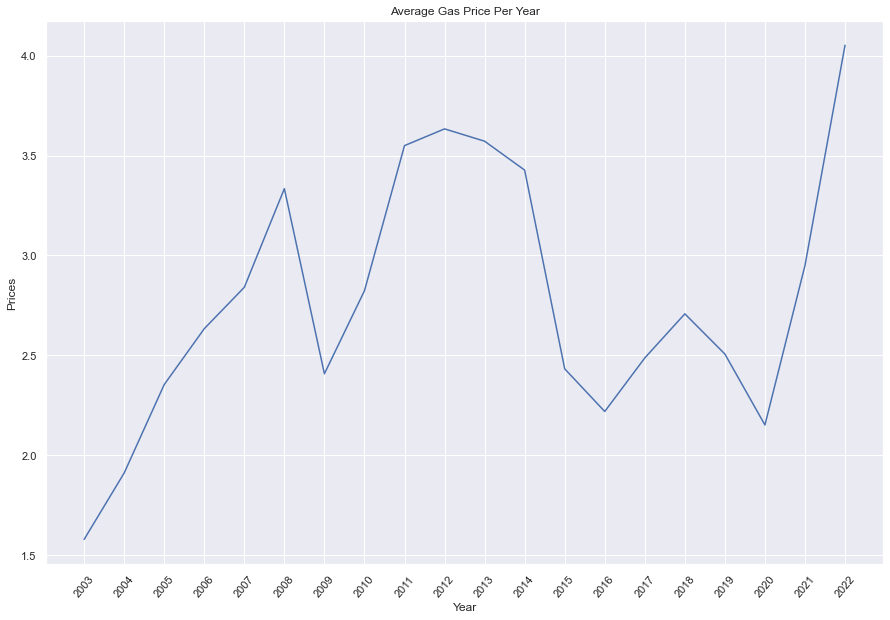

In [34]:
default_x_ticks = range(len(x_axis))

plt.figure(figsize=(15,10))
plt.plot(default_x_ticks, y_axis)
plt.xticks(default_x_ticks, x_axis)
plt.xticks(rotation=50)
plt.ylabel("Prices")
plt.xlabel("Year")
plt.title("Average Gas Price Per Year")
plt.show()

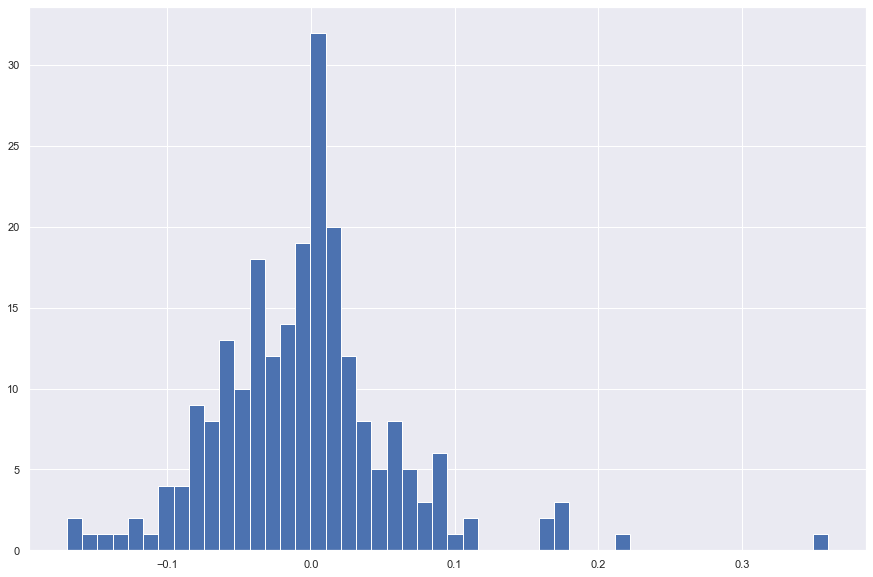

In [38]:
# view distribution of price changes

price_changes =  round(np.log(df["Price"]).diff(), 2)
price_changes.hist(bins=50, figsize=(15,10))
plt.show()

Change in gas price central tendency is 10 cents month over month.

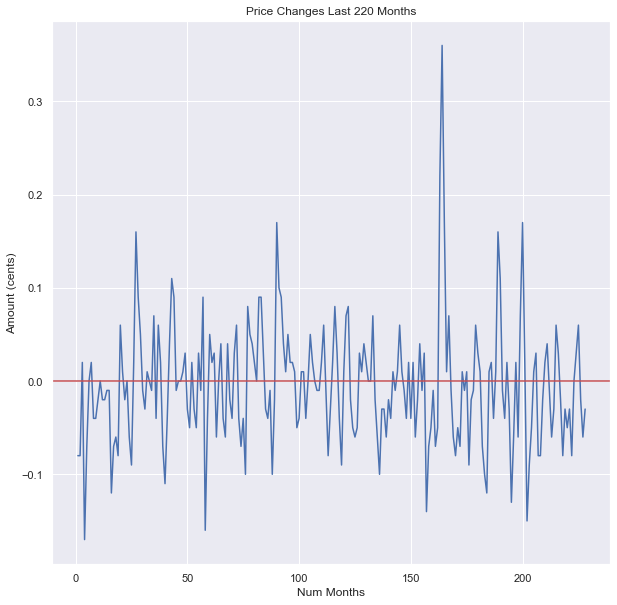

In [103]:
price_changes.plot(figsize=(10,10))
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Price Changes Last 220 Months")
plt.ylabel("Amount (cents)")
plt.xlabel("Num Months")

plt.show()

In [28]:
price_changes.describe()

count    228.000000
mean      -0.004868
std        0.064838
min       -0.170000
25%       -0.040000
50%       -0.010000
75%        0.022500
max        0.360000
Name: Price, dtype: float64

### Featuer Engineering

In [58]:
# Create 1 month trailing price column
df_dum["Price lag_1"] = df_dum["Price"].shift(1)

In [59]:
df_dum.head()

,Price,Price lag_1,Year,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,4.809,NaN,2022,0,0,0,0,0,1,0,0,0,0,0
1,4.428,4.809,2022,0,0,0,0,0,0,0,1,0,0,0
2,4.105,4.428,2022,0,0,0,0,0,0,0,0,0,0,0
3,4.186,4.105,2022,0,0,0,0,0,0,1,0,0,0,0
4,3.520,4.186,2022,0,0,1,0,0,0,0,0,0,0,0


In [60]:
# Lets change the position of the price lag column

In [61]:
df_dum.insert(1, 'Price lag_1', df_dum.pop('Price lag_1'))

In [62]:
df_dum.head()

,Price,Price lag_1,Year,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,4.809,NaN,2022,0,0,0,0,0,1,0,0,0,0,0
1,4.428,4.809,2022,0,0,0,0,0,0,0,1,0,0,0
2,4.105,4.428,2022,0,0,0,0,0,0,0,0,0,0,0
3,4.186,4.105,2022,0,0,0,0,0,0,1,0,0,0,0
4,3.520,4.186,2022,0,0,1,0,0,0,0,0,0,0,0


In [63]:
# Drop null values
df_dum.dropna(inplace= True)

## Modeling
We are going to build a model that predicts average gas price for next month.

In [106]:
#Split data

X = df_dum.drop("Price", axis= 1)
y = df_dum["Price"]

In [107]:
# train/ test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 12), (46, 12), (183,), (46,))

In [108]:
# import model
from sklearn.linear_model import LinearRegression

model_lin = LinearRegression()

# Fit model
model_lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
lin_preds = model_lin.predict(X_test)
lin_preds

array([2.84160754, 2.80644358, 2.79704102, 2.47188584, 2.67051209,
       3.06861963, 2.65046076, 2.7232247 , 2.67865818, 2.834641  ,
       2.98015556, 2.59381795, 2.88953847, 2.97867151, 2.92906405,
       2.95720333, 2.33818628, 2.6281775 , 2.53873562, 2.81764775,
       2.69279535, 2.91330578, 2.70238304, 2.61610121, 2.67274402,
       2.98247773, 2.67122724, 3.10733013, 2.4941691 , 2.57905688,
       2.71731054, 2.46011839, 2.48240165, 2.85692426, 2.54925143,
       2.41555187, 2.57153469, 2.52267536, 2.79536449, 3.08504687,
       3.06276361, 2.66670587, 3.11318615, 2.8360826 , 2.7246663 ,
       2.80040543])

In [110]:
model_lin.score(X_train, y_train)

0.08190268652950194

The model is 93% accurate in predict gas prices

In [111]:
# import model 2 
from sklearn.ensemble import RandomForestRegressor
model_rg = RandomForestRegressor()
model_rg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [112]:
model_rg.score(X_train, y_train)

0.9763860422976336

In [113]:
## test data
reg_preds = model_rg.predict(X_test)
reg_preds

array([3.58523, 2.48126, 2.41053, 2.1064 , 1.89709, 2.4961 , 3.84679,
       2.20828, 3.70579, 3.00233, 3.00004, 3.63787, 2.54231, 2.99936,
       3.65873, 2.91186, 1.58278, 3.75449, 3.40918, 3.50121, 2.30982,
       2.75009, 2.20288, 2.45815, 3.63497, 2.78362, 3.05463, 3.00047,
       2.57608, 1.62142, 2.2965 , 3.50127, 2.23132, 4.21674, 3.71557,
       2.84219, 3.59713, 2.81649, 3.00421, 2.16944, 2.48457, 3.10628,
       2.60493, 4.21674, 2.48677, 3.51108])

In [114]:
model_rg.score(X_test, y_test)

0.5957240573327016

In [115]:
import xgboost as xgb


In [116]:
# Create and Train model

model_xgb = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [117]:
#Fit model
model_xgb.fit(X_train, y_train)


[18:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=123, reg_alpha=0, ...)

In [118]:
# Predict the model
xgb_pred = model_xgb.predict(X_test)
xgb_pred

array([3.4655247, 2.3932626, 2.4606967, 2.1075466, 1.9422798, 2.3845637,
       3.3971114, 2.3311524, 3.4255574, 2.9548116, 2.9170797, 3.437561 ,
       2.516473 , 2.9548116, 3.4655247, 2.8102107, 1.5661839, 3.3971114,
       3.236064 , 3.3394625, 2.3284447, 2.5079045, 2.3149602, 2.3845637,
       3.3971114, 2.5456364, 2.8412979, 2.9548116, 2.6137056, 1.6398505,
       2.210554 , 3.3394625, 2.4606967, 4.1075068, 3.4655247, 2.6882277,
       3.4655247, 2.7172365, 2.8412979, 2.1781838, 2.4580514, 2.8412979,
       2.516473 , 3.829403 , 2.4882772, 3.4655247], dtype=float32)

In [119]:
model_xgb.score(X_test, y_test)

0.6675495246317117

In [120]:
df_compare = pd.DataFrame({"Price":y_test, "Prediction": xgb_pred}, index=None).reset_index(drop=True)
df_compare.head()

,Price,Prediction
0,3.658,3.465525
1,2.577,2.393263
2,2.671,2.460697
3,2.704,2.107547
4,1.929,1.942280


# Phase 6: Share

Text(0.5, 1.0, 'Price Comparison - Predicted vs Actual')

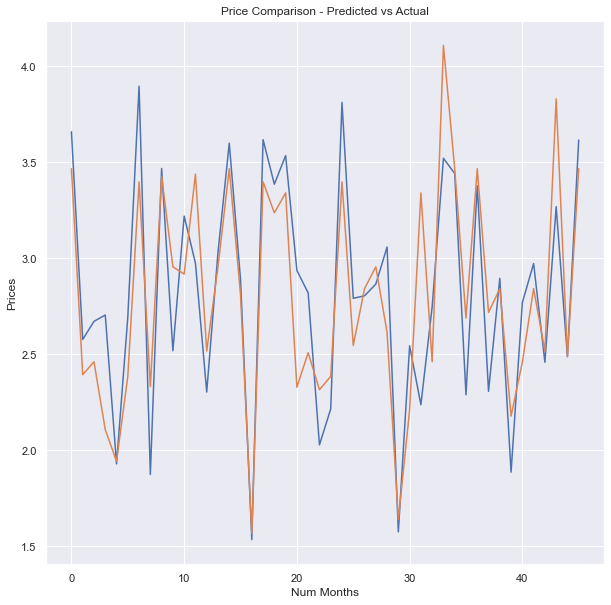

In [125]:
# Compare Model predictions with actual values
plt.figure(figsize=(10,10))
plt.plot(df_compare["Price"])
plt.plot(df_compare["Prediction"])
plt.ylabel("Prices")
plt.xlabel("Num Months")
plt.title("Price Comparison - Predicted vs Actual")


# Final Results

1. Our model is 68% accurate. In order to improve our model we need more data. The look back perioid should be increased.
2. The use has not experience price levels this high since 2008 and 2012 respectively.
3. Though relative volatilty has been management with 10 cent increases month over month, 
   it still represebts a 48% increase from the mean.